# Coffee Data Exploration

Welcome to the data exploration notebook for **BrewIntelligence**. 

## Objectives
1. Load the raw coffee dataset.
2. Inspect the data structure, missing values, and types.
3. Perform preliminary data cleaning.
4. Visualize key metrics (Price, Rating).
5. Analyze Correlation between Price and Rating.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="whitegrid")

## 1. Load Data

In [ ]:
# Load the dataset
df = pd.read_csv('archive/coffee_analysis.csv')

# Display basic info
print(f"Dataset Shape: {df.shape}")
df.head()

## 2. Initial Inspection

In [ ]:
# Check data types and missing values
df.info()

In [ ]:
# Check for duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Check for missing values
df.isnull().sum()

## 3. Data Cleaning Pipeline
We will merged the description columns into a single `review` column and combine origin fields.

In [ ]:
# 1. Combine Description Columns
# Fill NaNs with empty strings before joining
df['desc_1'] = df['desc_1'].fillna('')
df['desc_2'] = df['desc_2'].fillna('')
df['desc_3'] = df['desc_3'].fillna('')

df['review'] = df['desc_1'] + " " + df['desc_2'] + " " + df['desc_3']

# Clean up whitespace
df['review'] = df['review'].str.strip()

# 2. Combine Origin Columns
df['origin_1'] = df['origin_1'].fillna('')
df['origin_2'] = df['origin_2'].fillna('')
df['origin'] = df.apply(lambda row: f"{row['origin_1']}, {row['origin_2']}" if row['origin_2'] else row['origin_1'], axis=1)

# 3. Drop redundant columns
df_clean = df.drop(columns=['desc_1', 'desc_2', 'desc_3', 'origin_1', 'origin_2'])

df_clean.head()

## 4. Visualizations
Let's look at the distribution of Ratings and Prices.

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Coffee Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

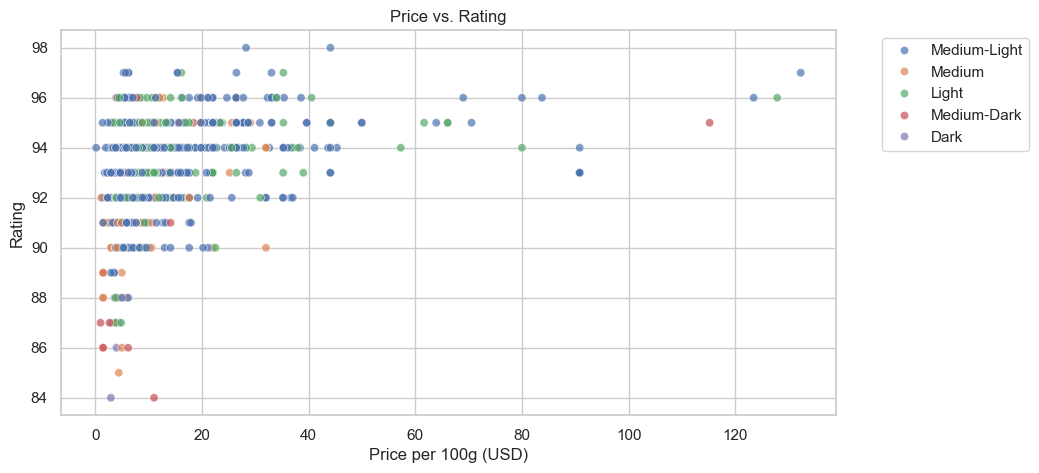

In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_clean, x='100g_USD', y='rating', hue='roast', alpha=0.7)
plt.title('Price vs. Rating')
plt.xlabel('Price per 100g (USD)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 5. Statistical Analysis: Price vs. Rating Correlation
We will calculate the Pearson correlation coefficient to see if there is a linear relationship between price and rating.

Correlation Matrix:
          100g_USD   rating
100g_USD   1.00000  0.25988
rating     0.25988  1.00000


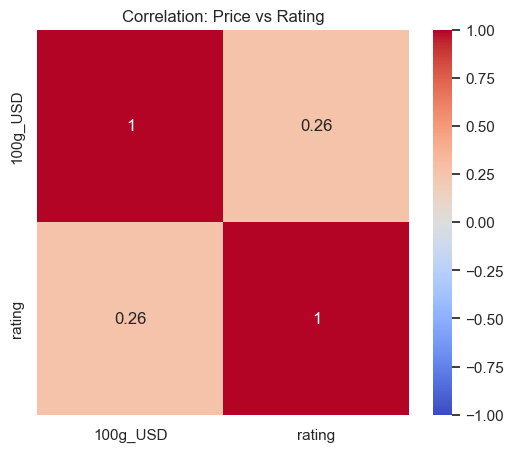

In [8]:
# Calculate correlation matrix
correlation_matrix = df_clean[['100g_USD', 'rating']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualizing the correlation
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Price vs Rating')
plt.show()

### Initial Insights
From the plot above, explore:
- Are more expensive coffees always higher rated?
- Which roast types dominate the high ratings?
